# Algorithm Performance Data Analysis - Run 3

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 110 | 0 | 
| max | 130 | 0.00020 | 
| step| 1 | 0.000001 | 
| iteration | 21 | 201 | 

In [12]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_201740.csv')

In [2]:
# Inspect the data
data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_201740,10404007.png,502730,44604,458126,0.911276,20,13,61265,6320,54945,0.896842,23.988469,2977.231883,13.392677,110,0.0000
1,2,test_20231101_201740,1254659.png,342646,104214,238432,0.695855,4,7,80080,14168,65912,0.823077,17.388292,2285.325643,14.541323,110,0.0000
2,3,test_20231101_201740,10188041.png,221231,13591,207640,0.938566,2,6,41731,1913,39818,0.954159,9.578884,813.111029,19.029305,110,0.0000
3,4,test_20231101_201740,10287332.png,216980,16294,200686,0.924906,3,4,22337,2218,20119,0.900703,8.782759,632.893397,20.117498,110,0.0000
4,5,test_20231101_201740,11610969.png,368720,42301,326419,0.885276,2,4,84111,6125,77986,0.927180,17.662498,2100.225157,14.908145,110,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42205,6,test_20231101_211503,10350842.png,212614,4809,207805,0.977382,2,6,42529,707,41822,0.983376,19.670071,2460.571781,14.220443,130,0.0002
42206,7,test_20231101_211503,10863862.png,317432,7431,310001,0.976590,2,5,66058,1092,64966,0.983469,35.678201,6511.628523,9.993907,130,0.0002
42207,8,test_20231101_211503,11382381.png,312486,699,311787,0.997763,1,4,46745,96,46649,0.997946,21.473010,2499.126187,14.152922,130,0.0002
42208,9,test_20231101_211503,11079715.png,443815,107829,335986,0.757041,4,4,124136,15131,109005,0.878109,17.708772,2317.625856,14.480370,130,0.0002


In [3]:
data.describe()

,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
count,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000,42210.000000
mean,5.500000,321053.700000,32824.255271,288229.444729,0.910321,2.656077,4.560625,60908.400000,4599.281592,56309.118408,0.939237,17.626801,2115.844794,15.355379,120.000000,0.000100
std,2.872315,92669.470578,40956.801068,77548.565230,0.096581,1.258846,1.904178,27852.687391,5669.039692,23087.448172,0.050482,5.098553,937.744538,2.151247,6.055372,0.000058
min,1.000000,212614.000000,256.000000,200686.000000,0.648335,1.000000,3.000000,22337.000000,37.000000,20119.000000,0.823077,8.782759,632.893397,9.993907,110.000000,0.000000
25%,3.000000,221231.000000,7431.000000,210192.000000,0.911276,2.000000,4.000000,41731.000000,1092.000000,40181.000000,0.910601,15.468329,1460.396837,13.661552,115.000000,0.000050
50%,5.500000,314959.000000,14224.000000,282571.500000,0.944936,2.000000,4.000000,54005.000000,1969.000000,50797.000000,0.955965,17.662498,2128.495685,14.850076,120.000000,0.000100
75%,8.000000,368720.000000,36454.000000,311787.000000,0.967390,3.000000,5.000000,80080.000000,5229.000000,68399.000000,0.976275,20.849918,2798.499051,16.486095,125.000000,0.000150
max,10.000000,502730.000000,156074.000000,486336.000000,0.999058,31.000000,52.000000,124136.000000,21528.000000,109005.000000,0.999077,35.678201,6511.628523,20.117498,130.000000,0.000200


## Analyze per Image

In [21]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [22]:
singe_image_data

,SN,TestID,FileName,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR,QuadtreeThreshold,AllowedExceedingThresholdFactor
0,1,test_20231101_162456,10404007.png,502730,27369,475361,0.945559,19,12,61265,3948,57317,0.935559,24.980919,3241.644400,13.023150,120,0.000000
10,1,test_20231101_162457,10404007.png,502730,27369,475361,0.945559,2,4,61265,3948,57317,0.935559,24.980919,3241.644400,13.023150,120,0.000005
20,1,test_20231101_162458,10404007.png,502730,27369,475361,0.945559,2,4,61265,3948,57317,0.935559,24.980919,3241.644400,13.023150,120,0.000010
30,1,test_20231101_162458,10404007.png,502730,27369,475361,0.945559,2,4,61265,3948,57317,0.935559,24.980919,3241.644400,13.023150,120,0.000015
40,1,test_20231101_162459,10404007.png,502730,27369,475361,0.945559,2,3,61265,3948,57317,0.935559,24.980919,3241.644400,13.023150,120,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41950,1,test_20231101_171210,10404007.png,502730,5774,496956,0.988515,2,4,61265,845,60420,0.986207,28.347204,4162.107488,11.937671,140,0.000975
41960,1,test_20231101_171211,10404007.png,502730,5634,497096,0.988793,3,4,61265,824,60441,0.986550,28.373376,4170.304000,11.929126,140,0.000980
41970,1,test_20231101_171212,10404007.png,502730,5634,497096,0.988793,2,4,61265,824,60441,0.986550,28.373376,4170.304000,11.929126,140,0.000985
41980,1,test_20231101_171213,10404007.png,502730,5634,497096,0.988793,1,3,61265,824,60441,0.986550,28.373376,4170.304000,11.929126,140,0.000990


In [ ]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [13]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_53641/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [5]:
data_grouped_by_test

,TestID,QuadtreeThreshold,AllowedExceedingThresholdFactor,SN,OriginalFileSize,CompressedBinSize,FileSizeDifference,CompressionRate,CompressionTime,DecompressionTime,UniquePixelCountBefore,UniquePixelCountAfter,UniquePixelCountReduction,UniquePixelCountReductionRate,MAE,MSE,PSNR
0,test_20231101_201740,110,0.000000,5.5,321053.7,41587.1,279466.6,0.886444,4.2,5.5,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
1,test_20231101_201741,110,0.000001,5.5,321053.7,41587.1,279466.6,0.886444,2.9,4.3,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
2,test_20231101_201742,110,0.000002,5.5,321053.7,41587.1,279466.6,0.886444,2.2,4.3,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
3,test_20231101_201743,110,0.000003,5.5,321053.7,41587.1,279466.6,0.886444,2.3,3.9,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
4,test_20231101_201744,110,0.000004,5.5,321053.7,41587.1,279466.6,0.886444,2.4,4.0,60908.4,5775.9,55132.5,0.922718,16.101271,1765.912919,16.059262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,test_20231101_211459,130,0.000196,5.5,321053.7,24370.6,296683.1,0.933698,2.1,3.9,60908.4,3449.1,57459.3,0.955335,20.424086,2809.445412,14.247998
4217,test_20231101_211500,130,0.000197,5.5,321053.7,24370.6,296683.1,0.933698,3.2,6.0,60908.4,3449.1,57459.3,0.955335,20.424086,2809.445412,14.247998
4218,test_20231101_211501,130,0.000198,5.5,321053.7,24370.6,296683.1,0.933698,2.4,4.8,60908.4,3449.1,57459.3,0.955335,20.424086,2809.445412,14.247998
4219,test_20231101_211502,130,0.000199,5.5,321053.7,24370.6,296683.1,0.933698,2.8,5.4,60908.4,3449.1,57459.3,0.955335,20.424086,2809.445412,14.247998


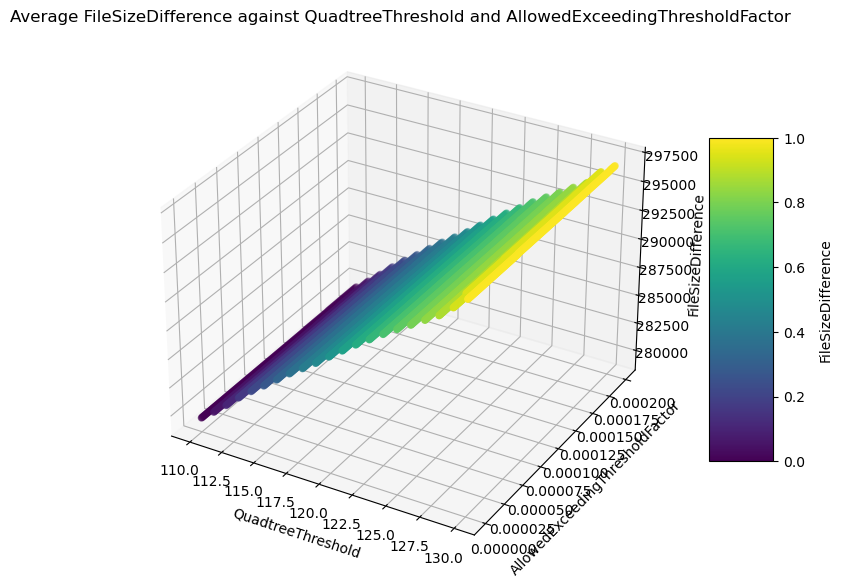

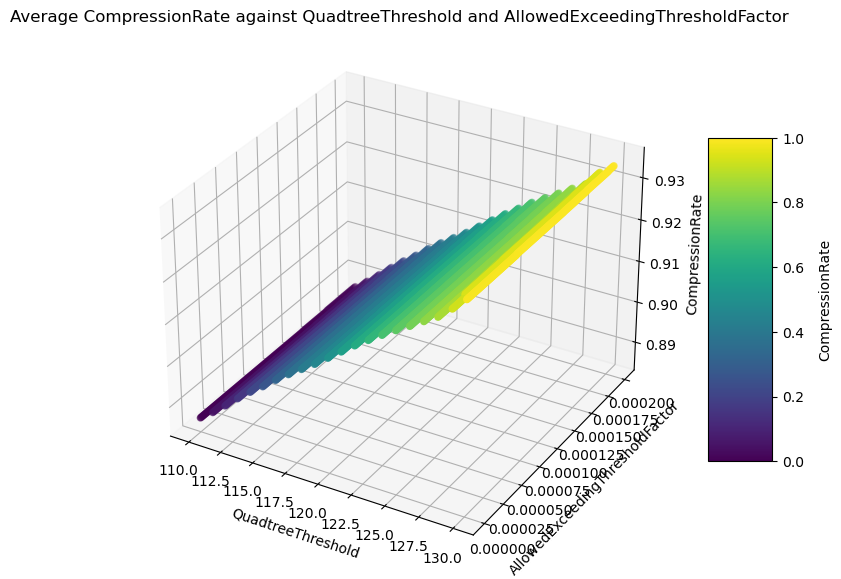

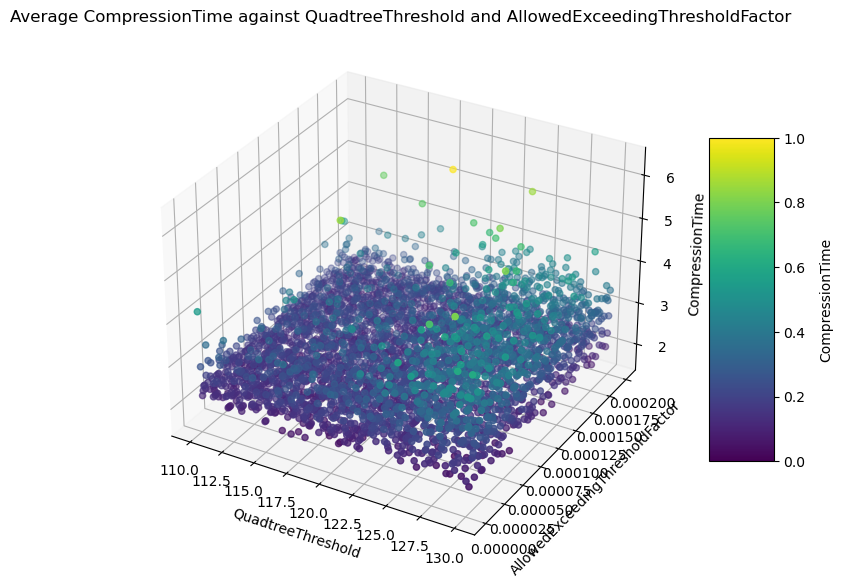

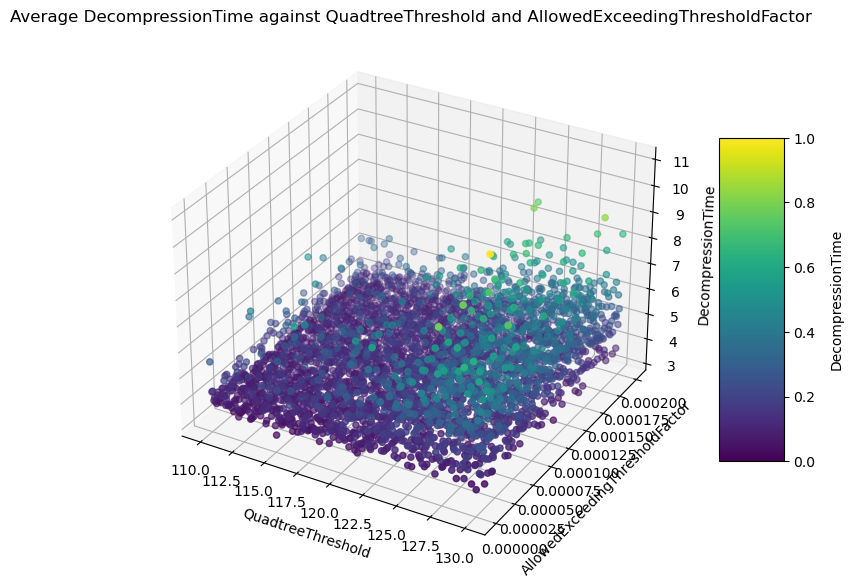

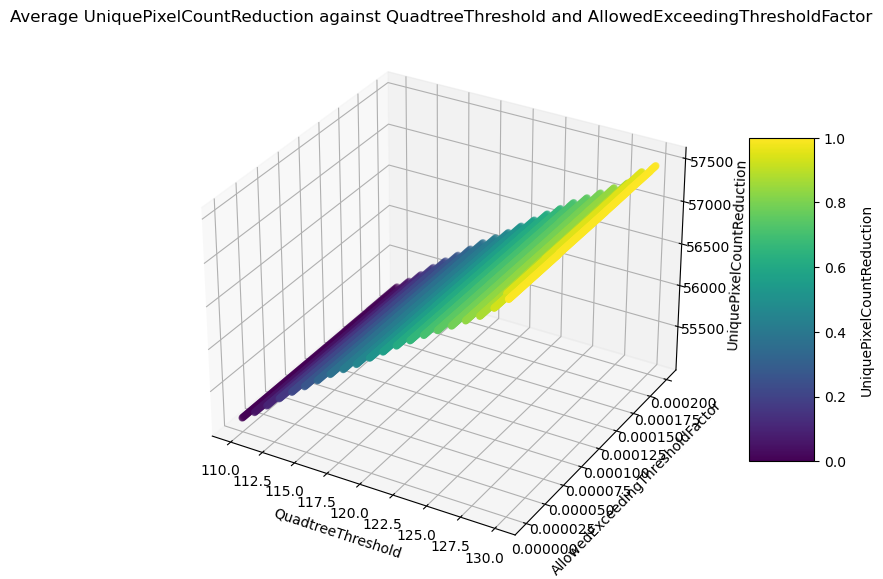

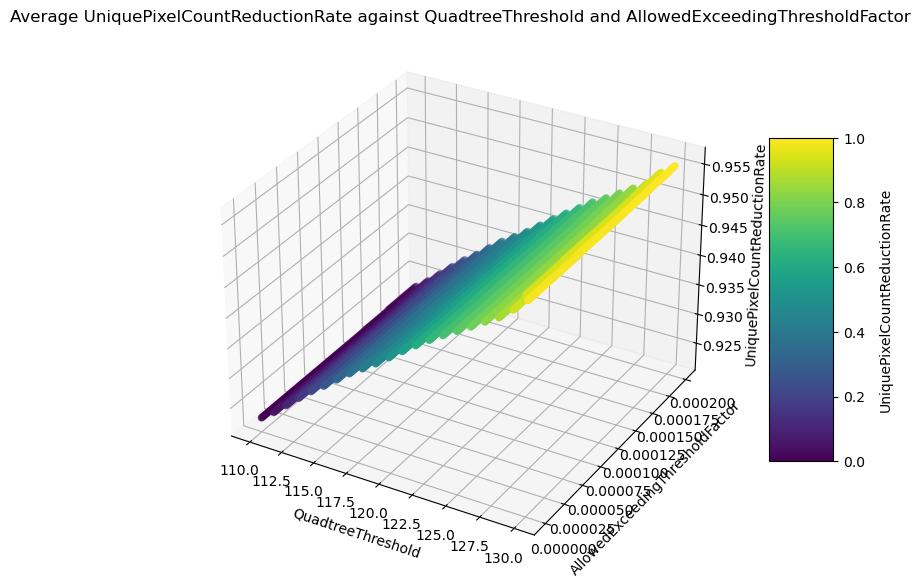

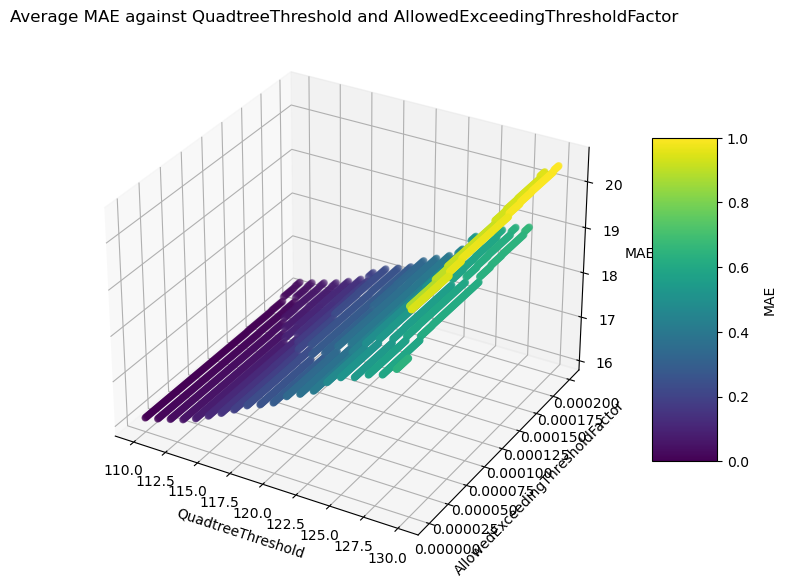

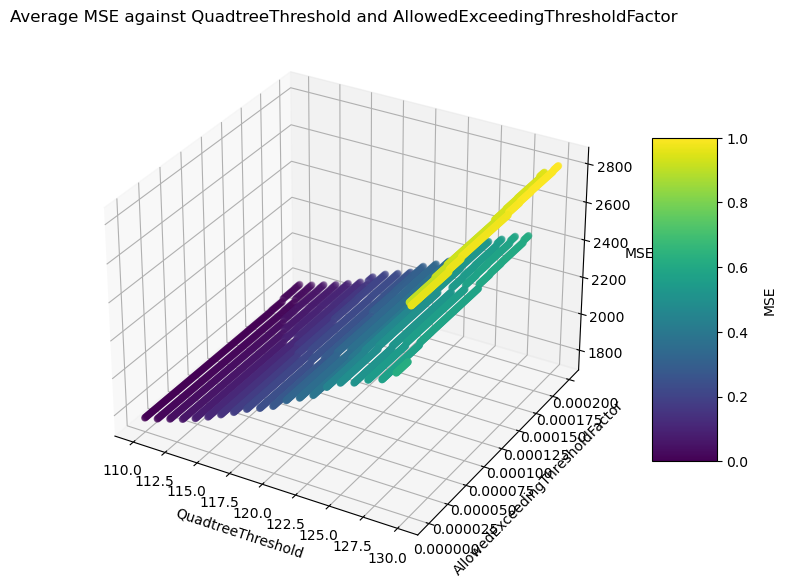

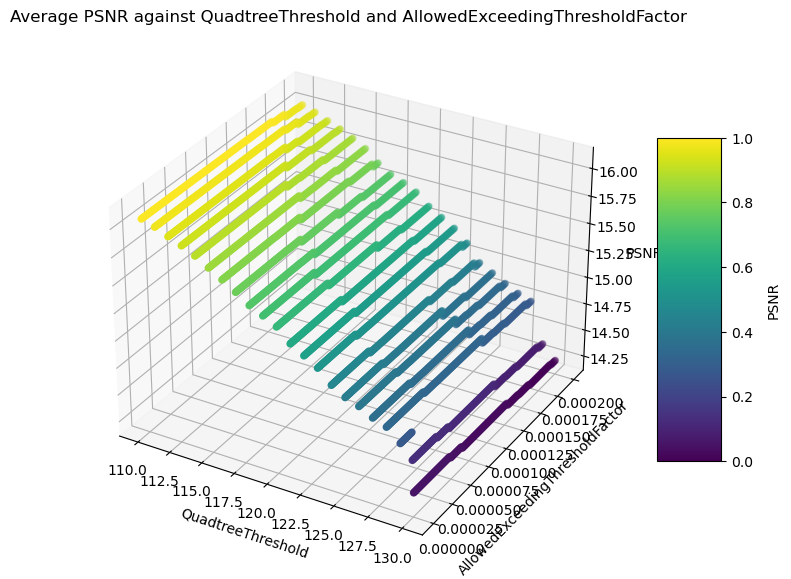

In [6]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


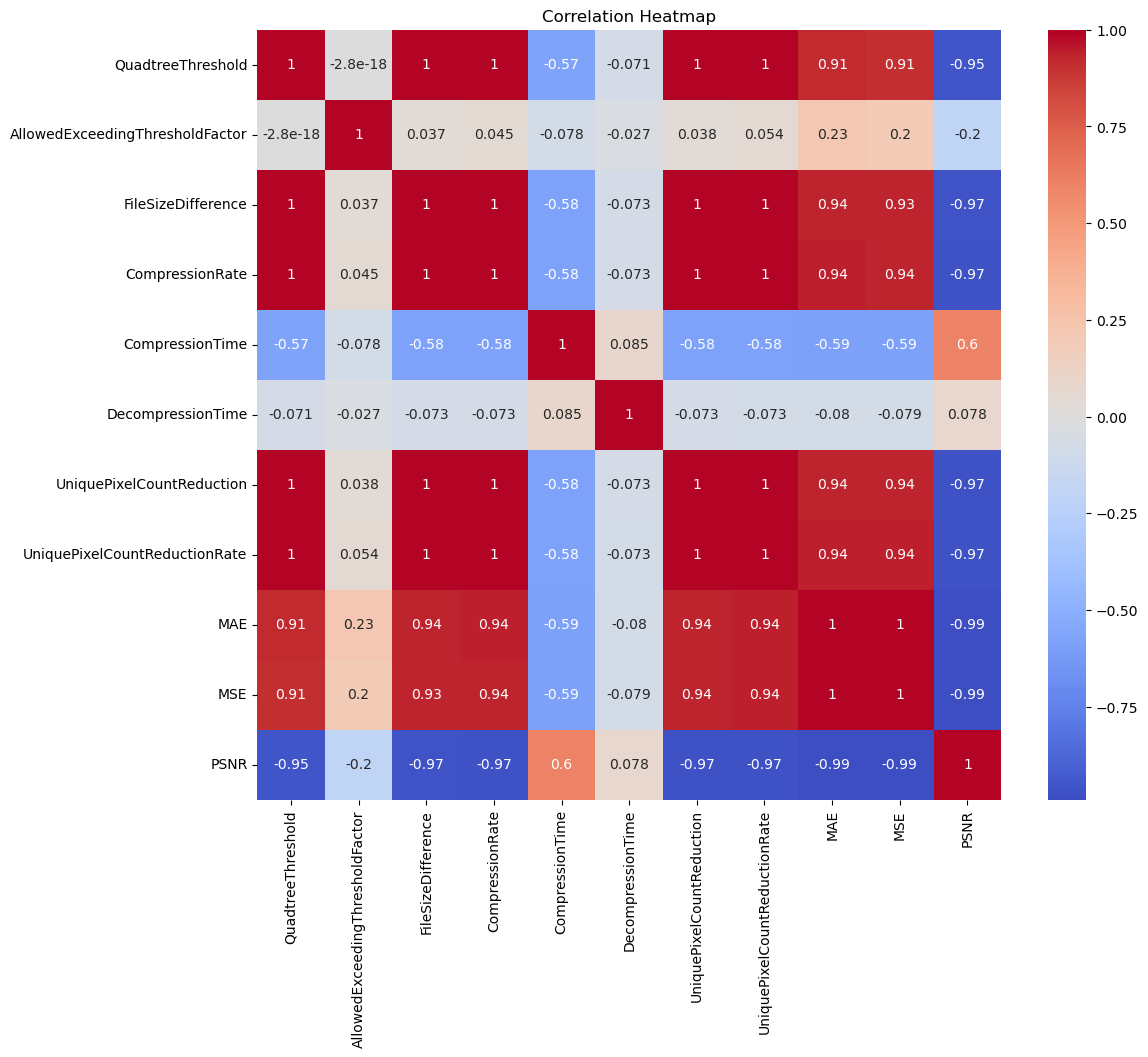

In [27]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [14]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
# data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

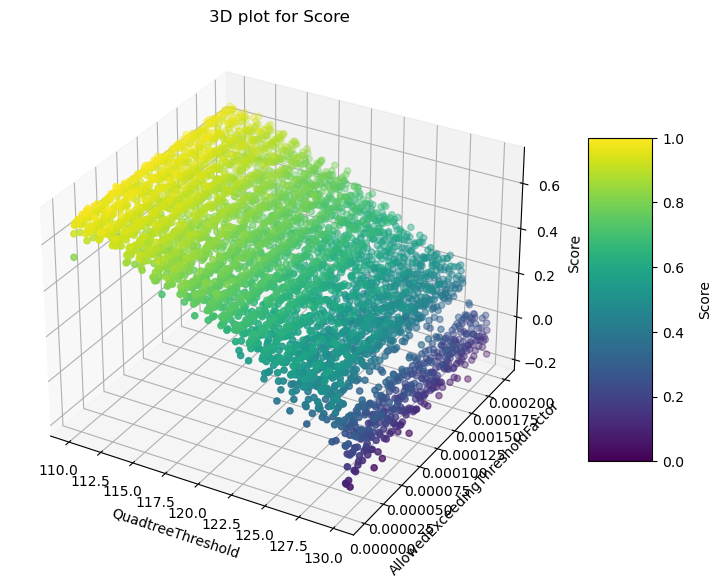

In [15]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

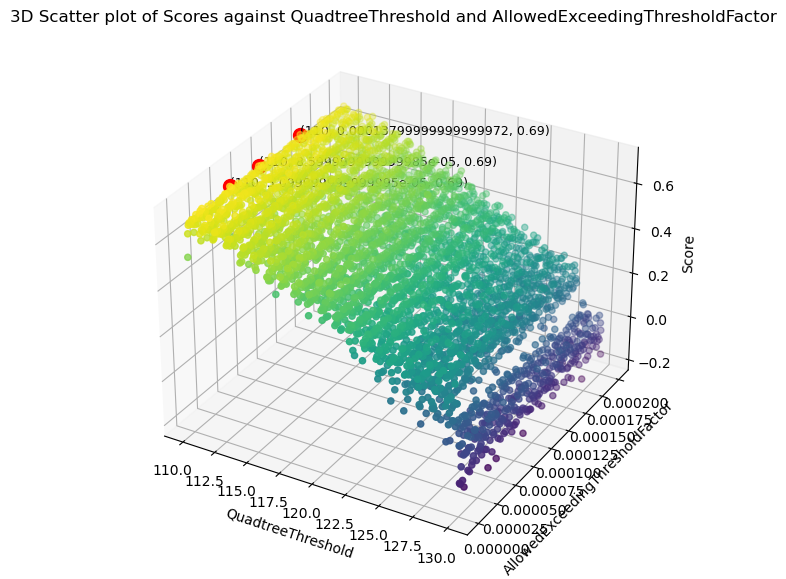

In [17]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [18]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


     QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
51                 110                         0.000051  0.693333
138                110                         0.000138  0.690609
86                 110                         0.000086  0.688503
